In [5]:
from rdkit import Chem
import numpy as np
import sys
sys.path.append('../')
sys.path.append('../data_processing/')
from openbabel import pybel
import matplotlib
import matplotlib.pylab as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import torch

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
torch.cuda.is_available()

True

In [8]:
from data_processing.ligand import Ligand

In [9]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG, Image
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.ipython_useSVG = True
IPythonConsole.molSize = 600, 300

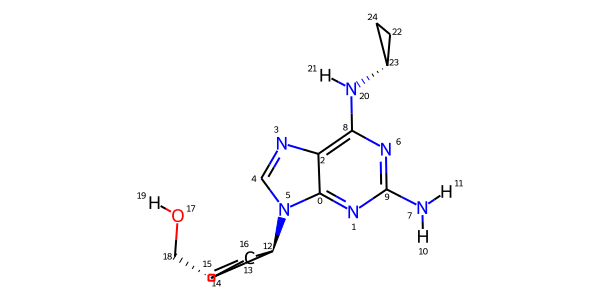

In [6]:
path = '../../data/1B57_HUMAN_25_300_0/3upr_C_rec_3upr_1kx_lig_tt_min_0.sdf'
rdmol = Chem.MolFromMolFile(path, sanitize=False)
rdmol

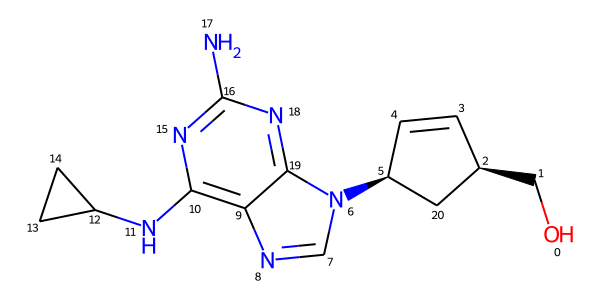

In [7]:
mol = Chem.MolFromSmiles(Chem.MolToSmiles(rdmol))
mol

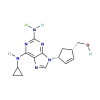

In [8]:
pbmol = next(pybel.readfile("sdf", path))
pbmol

# Construct pharmacophore graphs

In [9]:
ligand = Ligand(pbmol, rdmol, atom_positions=None, conformer_axis=None)
# len(ligand.graph.node_clusters)
len(ligand.pharmacophore_list)

5

In [14]:
len(ligand.graph.nodes)

6

In [19]:
# the graph is fully connected
for edge in ligand.graph.edges:
    print(edge.indices)

(0, 1)
(0, 2)
(1, 2)
(0, 3)
(1, 3)
(2, 3)
(0, 4)
(1, 4)
(2, 4)
(3, 4)
(0, 5)
(1, 5)
(2, 5)
(3, 5)
(4, 5)


In [ ]:
def construct_pp_graph(rdmol, ligand):
    for pp in ligand.pharmacophore_list:
        

# pytorch-geometric dataset

In [8]:
import glob, os
import pickle

In [7]:
with open('../../data/cleaned_crossdocked_data/index.pkl', 'rb') as f:
    index = pickle.load(f)
index

[('1B57_HUMAN_25_300_0/3vrj_A_rec.pdb',
  '1B57_HUMAN_25_300_0/3vrj_A_rec_5u98_1kx_lig_tt_min_0.sdf',
  0.6701),
 ('1B57_HUMAN_25_300_0/5u98_D_rec.pdb',
  '1B57_HUMAN_25_300_0/5u98_D_rec_5u98_1kx_lig_tt_min_0.sdf',
  0.3669),
 ('1B57_HUMAN_25_300_0/3upr_C_rec.pdb',
  '1B57_HUMAN_25_300_0/3upr_C_rec_5u98_1kx_lig_tt_min_0.sdf',
  0.4004),
 ('1B57_HUMAN_25_300_0/3vri_A_rec.pdb',
  '1B57_HUMAN_25_300_0/3vri_A_rec_5u98_1kx_lig_tt_docked_0.sdf',
  0.5267),
 ('1B57_HUMAN_25_300_0/3vri_A_rec.pdb',
  '1B57_HUMAN_25_300_0/3vri_A_rec_5u98_1kx_lig_tt_min_0.sdf',
  0.5178),
 ('1B57_HUMAN_25_300_0/3vrj_A_rec.pdb',
  '1B57_HUMAN_25_300_0/3vrj_A_rec_3upr_1kx_lig_tt_min_0.sdf',
  0.7476),
 ('1B57_HUMAN_25_300_0/5u98_D_rec.pdb',
  '1B57_HUMAN_25_300_0/5u98_D_rec_3upr_1kx_lig_tt_min_0.sdf',
  0.4364),
 ('1B57_HUMAN_25_300_0/3upr_C_rec.pdb',
  '1B57_HUMAN_25_300_0/3upr_C_rec_3upr_1kx_lig_tt_min_0.sdf',
  0.3355),
 ('1B57_HUMAN_25_300_0/3vri_A_rec.pdb',
  '1B57_HUMAN_25_300_0/3vri_A_rec_3upr_1kx_lig_tt_min

In [10]:
docked_pdb = os.listdir('../../data/cleaned_crossdocked_data')
len(docked_pdb)

2402

In [2]:
def list_sdf_files(root):
    return glob.glob(root+'*/*.sdf')

In [46]:
small_dataset = list_sdf_files('../../data/small_dataset/')
small_dataset

['../../data/small_dataset/ZIPA_ECOLI_187_328_0/1s1s_B_rec_1y2g_cl3_lig_tt_min_0.sdf',
 '../../data/small_dataset/ZIPA_ECOLI_187_328_0/1y2f_A_rec_1y2g_cl3_lig_tt_min_0.sdf',
 '../../data/small_dataset/ZIPA_ECOLI_187_328_0/1s1j_A_rec_1y2g_cl3_lig_tt_min_0.sdf',
 '../../data/small_dataset/ZIPA_ECOLI_187_328_0/1s1s_B_rec_1y2f_wai_lig_tt_min_0.sdf',
 '../../data/small_dataset/ZIPA_ECOLI_187_328_0/1y2g_A_rec_1y2g_cl3_lig_tt_min_0.sdf',
 '../../data/small_dataset/ZIPA_ECOLI_187_328_0/1y2g_A_rec_1y2g_cl3_lig_tt_docked_3.sdf',
 '../../data/small_dataset/ZIPA_ECOLI_187_328_0/1y2f_A_rec_1y2f_wai_lig_tt_min_0.sdf',
 '../../data/small_dataset/ZIPA_ECOLI_187_328_0/1y2g_A_rec_1s1j_iqz_lig_tt_docked_15.sdf',
 '../../data/small_dataset/ZIPA_ECOLI_187_328_0/1s1s_B_rec_1s1j_iqz_lig_tt_docked_7.sdf',
 '../../data/small_dataset/ZIPA_ECOLI_187_328_0/1y2g_A_rec_1y2f_wai_lig_tt_min_0.sdf',
 '../../data/small_dataset/ZAP70_HUMAN_327_607_0/2ozo_A_rec_2ozo_anp_lig_tt_docked_2.sdf',
 '../../data/small_dataset/ZA

In [45]:
for filename in small_dataset:
    rdmol = Chem.MolFromMolFile(filename, sanitize=False)
    conformer = rdmol.GetConformer()
    atom_positions = conformer.GetPositions()
    print(filename)
    print(atom_positions)

../../data/small_dataset/ZIPA_ECOLI_187_328_0/1s1s_B_rec_1y2g_cl3_lig_tt_min_0.sdf
[[26.5949 14.1818  4.0963]
 [25.8784 14.1196  5.1629]
 [26.2695 14.5339  6.3947]
 [27.6289 15.1265  6.5607]
 [28.4162 15.213   5.4395]
 [27.8834 14.7143  4.0934]
 [24.6199 13.6413  5.3619]
 [24.3282 13.8075  6.6795]
 [25.2947 14.3268  7.2771]
 [28.6766 14.7816  2.8314]
 [28.5015 13.7871  1.819 ]
 [29.2627 13.8358  0.619 ]
 [30.2029 14.8724  0.4217]
 [30.383  15.8674  1.4115]
 [29.6278 15.8241  2.6025]
 [23.6609 13.0473  4.3924]
 [24.1554 12.556   3.1603]
 [23.287  11.9841  2.1879]
 [21.9    11.9027  2.4667]
 [21.3892 12.3792  3.6869]
 [22.2613 12.9505  4.6468]
 [25.3756 12.7799 -0.086 ]
 [23.8125 11.5281  1.0092]
 [22.953  10.7278  0.1139]
 [25.0791 11.7582  0.5368]
 [26.1718 10.708   0.7884]]
../../data/small_dataset/ZIPA_ECOLI_187_328_0/1y2f_A_rec_1y2g_cl3_lig_tt_min_0.sdf
[[2.67215e+01 1.45483e+01 4.23880e+00]
 [2.61342e+01 1.46574e+01 5.37800e+00]
 [2.66982e+01 1.51617e+01 6.50540e+00]
 [2.81083e+01 

In [21]:
from data_processing.paired_data import PharmacophoreDataset
dataset = PharmacophoreDataset(root='../../data/small_dataset')

In [22]:
dataset[0], dataset[10]

(Data(x=[17, 8], pos=[17, 3], target_x=[17, 8], target_pos=[17, 3]),
 Data(x=[33, 8], pos=[33, 3], target_x=[33, 8], target_pos=[33, 3]))

In [31]:
len(dataset.data)

/home/conghao001/miniconda3/envs/pp2drug/lib/python3.10/site-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


4

In [24]:
from torch_geometric.loader import DataLoader

In [25]:
data_loader = DataLoader(dataset, batch_size=20, shuffle=True)
next(iter(data_loader))

DataBatch(x=[333, 8], pos=[333, 3], target_x=[333, 8], target_pos=[333, 3], batch=[333], ptr=[15])

In [29]:
dataset[13]

Data(x=[33, 8], pos=[33, 3], target_x=[33, 8], target_pos=[33, 3])

# Error occurs for CCPR_YEAST_69_361_0 ligand
- The ligand pdb id is 3mt
- reason: ligand is too small to have any pharmacophores

In [10]:
from data_processing.paired_data import PharmacophoreDataset

In [33]:
whole_dataset = PharmacophoreDataset(root='../../data/cleaned_crossdocked_data', split='train')

In [34]:
len(whole_dataset)

190431

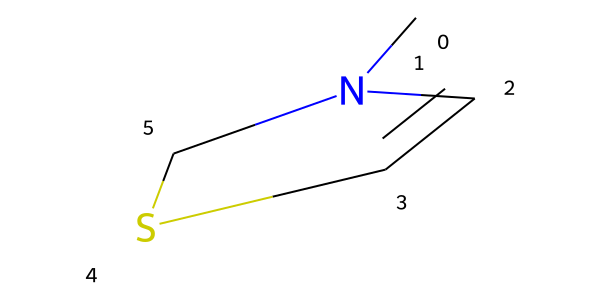

In [12]:
path = '../../data/small_dataset/raw/CCPR_YEAST_69_361_0/1aee_A_rec_1aeb_3mt_lig_tt_min_0.sdf'
rdmol = Chem.MolFromMolFile(path, sanitize=False)
rdmol

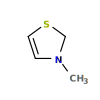

In [13]:
pbmol = next(pybel.readfile("sdf", path))
pbmol

In [14]:
ligand = Ligand(pbmol, rdmol, atom_positions=None, conformer_axis=None)

In [15]:
all_pp = []
for i, (pp_type, pp_node) in enumerate(ligand.pharmacophore_list):
    atom_indices = tuple([pp_node.atom_indices]) if type(pp_node.atom_indices)==int else tuple(sorted(pp_node.atom_indices))
#     print(pp_type, atom_indices)
    all_pp.append([pp_type, atom_indices, i])
    

all_pp

[]